<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Data-Sciene-BEDU-Santander-2021/blob/main/Machine%20Learning/Sesion_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sesion 4. Repaso de Regresión Lineal

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2004.%20Regresiones/Ejercicio02/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

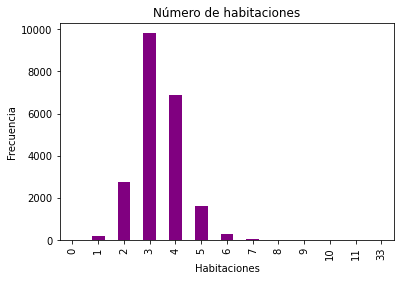

In [ ]:
# EDA de sitintas varabkes
#Barplot de habitaciones
data["bedrooms"].value_counts().sort_index().plot(kind = "bar", color = "purple")
plt.title("Número de habitaciones")
plt.xlabel("Habitaciones")
plt.ylabel("Frecuencia");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

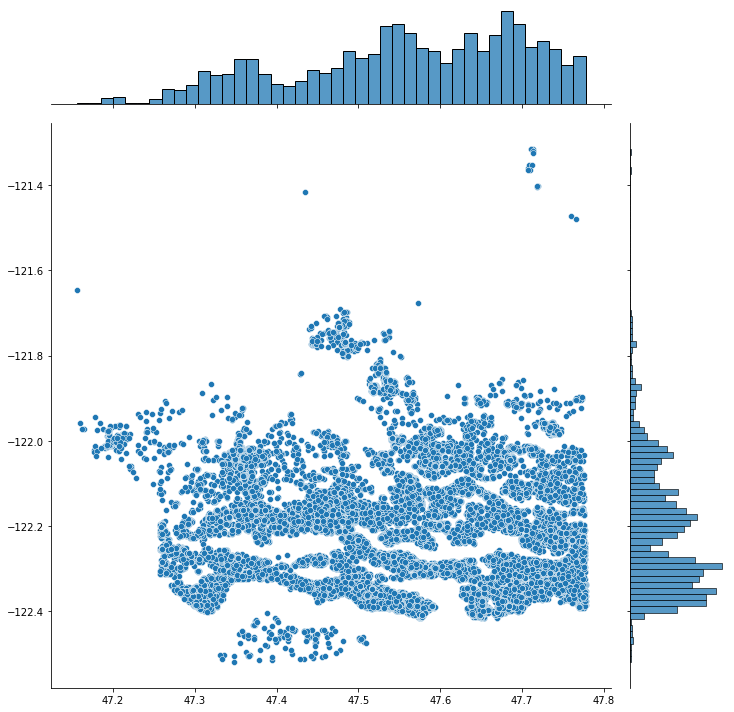

In [ ]:
# De dispersión de localización

plt.figure(figsize=(10,10))
sns.jointplot(x= data.lat.values, y = data.long.values, size=10);
plt.ylabel('Longitud', fontsize = 12)
plt.xlabel('Latitud', fontsize = 12)
plt.show();

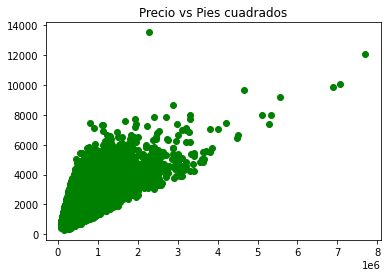

In [ ]:
# De dispersión del precio contra pies cuadrados construidos

plt.scatter(data.price, data.sqft_living, color = "green")
plt.title("Precio vs Pies cuadrados");

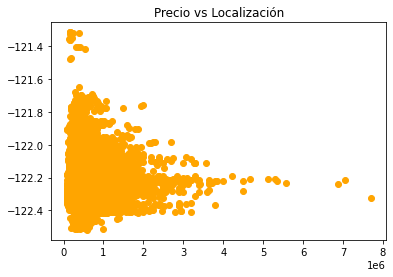

In [ ]:
# De Precio contra localización
plt.scatter(data.price, data.long, color = "orange")
plt.title("Precio vs Localización");

In [ ]:
# Creamos una var dummy
labels = data['price']

# fragmentamos para año 2014
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates

# Seleccionamos datos de training
train1 = data.drop(['id', 'price'], axis=1)

In [ ]:
print(data.date)
print(train1.columns)
train1.describe()
labels.head(10)

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: date, Length: 21613, dtype: int64
Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1225000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting con Scki-kit Leatn
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

# Fitting
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Score de la R^2
regressor.score(x_test,y_test)

0.7320342760357625

### Reto

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2004.%20Regresiones/Reto03/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


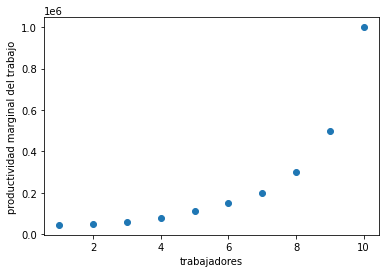

In [8]:
x = data.Level.values.reshape(-1,1)
y = data.Salary.values.reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("trabajadores")
plt.ylabel("productividad marginal del trabajo")
plt.show()

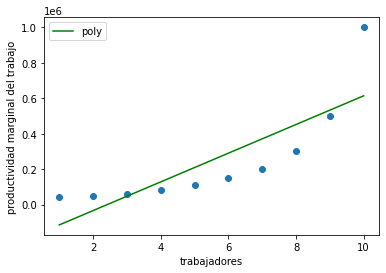

In [17]:
# Hagamos el fit de los datos
linear_regression = LinearRegression()
linear_regression.fit(x,y)

# Veamos como se ajusta la nueva regresión polinomica
y_head2 = linear_regression.predict(x)

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.scatter(x,y)
plt.xlabel("trabajadores")
plt.ylabel("productividad marginal del trabajo")
plt.show()

In [24]:
polynominal_regression = PolynomialFeatures(degree=2)
x_polynomial = polynominal_regression.fit_transform(x,y)

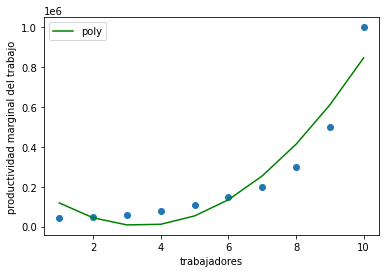

In [25]:
# Hagamos el fit de los datos
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)

# Veamos como se ajusta la nueva regresión polinomica
y_head2 = linear_regression.predict(x_polynomial)

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.scatter(x,y)
plt.xlabel("trabajadores")
plt.ylabel("productividad marginal del trabajo")
plt.show()

In [26]:
# Calculemos el R^2
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head2))

r_square score:  0.9162082221443942
